# PHYS 325 Scientific Computing -- Fall 2018

### Function optimization

(finding the minimum/maximum of a function)

In physics we often need minimization, for instance:

- equilibrium problems (potential energy minimum)
- quantum mechanical ground state (energy minimum)
- minimization of the action, Fermat's principle
- data fitting (linear least-squares)

Minima | $\leftrightarrow$ | Maxima
-------|-------------------|----------
$f(x)$ | $\leftrightarrow$ | $-f(x)$

Relation to root finding:

$$
\frac{df}{dx} = 0
$$

But minimization problems are in general simpler:

- might need the minimum of $f(x_1,\ldots,x_N)$ with respect to several variables
- but no analog to simultaneous equations in many variables

There can be many maxima and minima:

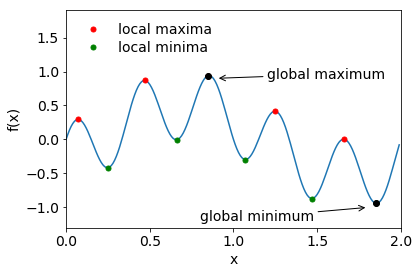

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

def f(x):
    return np.cos(2*np.pi*(x+0.1))*np.sin(3*np.pi*x)

x = np.arange(0.0, 2.0, 0.01)
y = f(x)

localMaxima = argrelextrema(y, np.greater)[0]
localMinima = argrelextrema(y, np.less)[0]

plt.rcParams.update({'font.size': 14})

plt.plot(x, y)
plt.plot(x[localMaxima], f(x[localMaxima]), 'r.', markersize=10, label='local maxima')
plt.plot(x[localMinima], f(x[localMinima]), 'g.', markersize=10, label='local minima')
plt.plot(x[localMaxima[2]], f(x[localMaxima[2]]), 'k.', markersize=12)
plt.plot(x[localMinima[4]], f(x[localMinima[4]]), 'k.', markersize=12)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='upper left', frameon=False, labelspacing=0.3)

plt.annotate('global maximum', xy=(0.9, 0.9), xytext=(1.2, 0.9),
             arrowprops=dict(arrowstyle="->"),
             )

plt.annotate('global minimum', xy=(1.8, -1.0), xytext=(0.8, -1.2),
             arrowprops=dict(arrowstyle="->"),
             )

plt.xlim(0, 2)
plt.ylim(-1.3, 1.9)
plt.show()

- there may be several global maxima/minima (but usually just one)
- often interested in global minimum, e.g. ground state
- local minima also interesting, e.g. metastable equilibrium
- most methods are good at finding extrema, but cannot distinguish between local and global ones

**Golden section search**

- similar to bisection for root finding
- minimum is bracketet by **three** points: function at center point is lower than at the two outside points
- we then choose another point inside the interval and update one of the two outside points

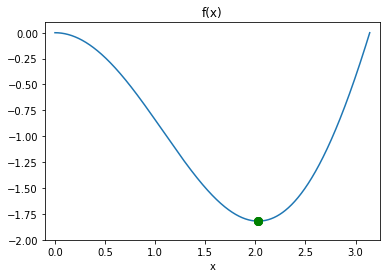

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from scipy.constants import golden

def f(x):
    return -np.sin(x)*x

x = np.linspace(0, np.pi, 1000)

a, b, c = 0.0, (golden - 1.0)*np.pi, np.pi
dummy = 1000

fig = plt.figure()
ax = plt.axes(xlim=(-0.1, np.pi + 0.1), ylim=(-2.0,0.1))

line, = ax.plot(x, f(x))
points, = ax.plot([a, b, c], [f(a), f(b), f(c)], 'g.', markersize=16)
nextpoint, = ax.plot(dummy , dummy, 'k.', markersize=16)

plt.xlabel('x')
plt.title('f(x)')

def animate(i):
    global a, b, c, d
    
    line.set_data(x, f(x))
    points.set_data([a,b,c], f([a,b,c]))
    
    if i%2==1:
        if (b-a) > (c-b):
            d = a + (golden - 1.0)*(b-a)
            if f(d) > f(b):
                a = d
            else:
                c = b
                b = d
        else:
            d = c - (golden - 1.0)*(c-b)
            if f(d) > f(b):
                c = d
            else:
                a = b
                b = d
        nextpoint.set_data(d, f(d))
    else:
        nextpoint.set_data(dummy, dummy)

    return line, points, nextpoint,

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=40)

from IPython.display import HTML
HTML(ani.to_jshtml())

How to choose the new point?

- we want the two inner points to be the same distance from their corresponding outer points 
- each new point should divide the interval according to the same ratio (scale similarity)

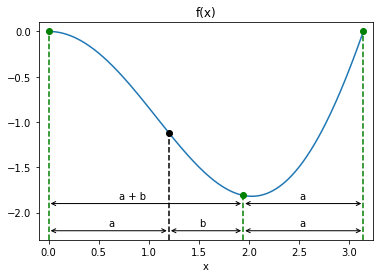

In [3]:
a, b, c = 0.0, (golden - 1.0)*np.pi, np.pi
d = a + (golden - 1.0)*(b-a)

fig = plt.figure()
ax = plt.axes(xlim=(-0.1, np.pi + 0.1), ylim=(-2.3,0.1))
ax.plot(x, f(x))

plt.xlabel('x')
plt.title('f(x)')

(markerline, stemlines, baseline) = plt.stem([a, b, c], [f(a), f(b), f(c)], 
                                             'g--', markerfmt='go', bottom = -2.3)
plt.stem([d], [f(d)], 'k--', markerfmt='ko', bottom = -2.3)
plt.setp(baseline, visible=False)
    
plt.annotate('', xy=(d, -2.2), xytext=(b, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(c, -2.2), xytext=(b, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(a, -2.2), xytext=(d, -2.2), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(c, -1.9), xytext=(b, -1.9), arrowprops=dict(arrowstyle="<->"),)
plt.annotate('', xy=(a, -1.9), xytext=(b, -1.9), arrowprops=dict(arrowstyle="<->"),)
plt.text(1.5,-2.15,'b')
plt.text(2.5,-2.15,'a')
plt.text(0.7,-1.85,'a + b')
plt.text(2.5,-1.85,'a')
plt.text(0.6,-2.15,'a')
    
plt.show()

$$\Rightarrow \frac{a+b}{a}=\frac{a}{b}\equiv\varphi=1.6180339887\ldots$$

This is the [**Golden Ratio**](https://en.wikipedia.org/wiki/Golden_ratio)

In [4]:
import numpy as np
from scipy.optimize import golden
import scipy.constants as spc
    
a, b, c = 0.0, (spc.golden - 1.0)*np.pi, np.pi
    
golden(f, brack=(a,b,c))

2.0287578271802458

In [5]:
from scipy.optimize import minimize_scalar

minimize_scalar(f, bracket=(a,b,c), method='Golden')

     fun: -1.819705741159653
    nfev: 42
     nit: 37
 success: True
       x: 2.0287578271802458

In [10]:
from scipy.optimize import minimize_scalar

minimize_scalar(f, bounds=(a,b,c), method='Brent')

     fun: -1.819705741159653
    nfev: 15
     nit: 10
 success: True
       x: 2.028757837653707

Finding a **global** extremum is, in general, very difficult!

Strategies:

(i) find many local extrema starting from widely varying starting values (perhaps chosen randomly), and then pick the most extreme of these

(ii) perturb a local extremum by taking a finite step away from it, and then see if your routine returns you to a better point, or "always" to the same one

(iii) simulated annealing methods => later in the lecture

**Multidimensional optimization**    

- steepest descent (gradient descent)

  Idea: follow the functions steepest slope down (for minimum) or up (for maximum)

  Gradient of a function

  $$
  \nabla f = \begin{pmatrix}
  \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_N}
  \end{pmatrix}
  $$

  points in the direction of the steepest slope!

    - take step size proportional to length of the gradient vector
    - each new step direction is orthogonal to the previous one (conjugate directions) => must make $90^\circ$ turn
    - typically (slow) zig-zag approach towards extremum
    - finds local extrema

- conjugate gradient method
    - similar to steepest descent, but faster
    - determines set of conjugate directions beforehand to avoid zig-zag
    - exactly one step in each direction

  <img src="images/Conjugate_gradient.png" alt="Conjugate gradient vs steepest descent" style="width: 280px;"/>

  <div style="text-align: right">Image from <a href="https://en.wikipedia.org/wiki/Conjugate_gradient_method">Wikipedia</a></div>
    
- Newton's method

- [Nelder-Mead Downhill Simplex Method](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method): geometric method, don't need to know derivatives